<a href="https://colab.research.google.com/github/BaduA/carpriceprediction/blob/main/carprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Normalization, Dense, InputLayer


**Data Preperation**

In [ ]:
data = pd.read_csv("train.csv",",")
data.head()

In [ ]:
data.shape

(1000, 12)

In [ ]:
tensor_data = tf.constant(data)
tensor_data = tf.random.shuffle(tensor_data)


In [ ]:
X = tensor_data[:,3:-1]
Y = tensor_data[:,-1]
Y = tf.expand_dims(Y, axis = -1)

In [ ]:
normalizer = Normalization()
normalizer.adapt(X)
normalizer(X)[:5]

In [28]:
model = tf.keras.Sequential()
model.add(InputLayer(input_shape = (8,)))
model.add(normalizer)
model.add(Dense(1))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  multiple                  17        
 on)                                                             
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 26 (108.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________


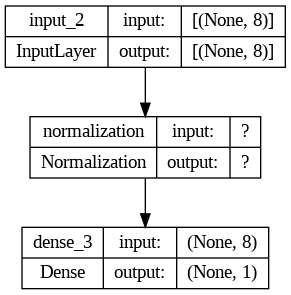

In [29]:
tf.keras.utils.plot_model(model,to_file ="model.png",show_shapes=True)